# THE SPARKS FOUNDATION
**INTERN DOMAIN** : DATA SCIENCE AND BUSINESS ANALYTICS

# BY SABESH CHARAN S
**TASK 2:**
Prediction using Unsupervised ML

**Problem statement:**
To predict the number of Iris dataset and represent them with graphical visualization.

**STEPS**
**->** importing libraries 
**->** tabulation of  Iris datasets
**->** to determine the shape of  data cluster in terms of ' sepal width '
**->** checking for null values from the tabulation
**->** removing outliers from the sepal width 
**->** to determine the optimal number of K-mean and the value of K. ( k stands for clustering). we also find the K-means classifier
**->** Graphical representation of data in clusters
**->** determination of Centroids
**->** combined graphical visalization of tabulated data along with centroids.

In [9]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [17]:
df = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)


In [18]:
iris_df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [19]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
#statistical details of Dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
#shape of the dataset
print(iris_df.shape)

(150, 4)


**Checking for null values- count the number of null values in Each column**

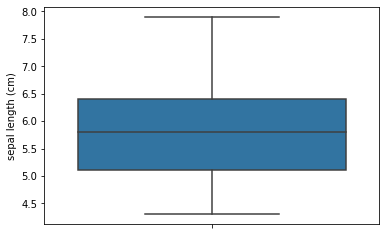

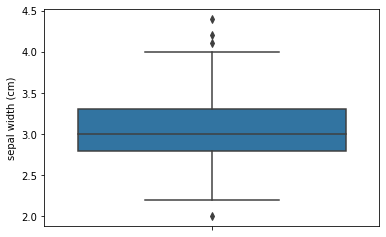

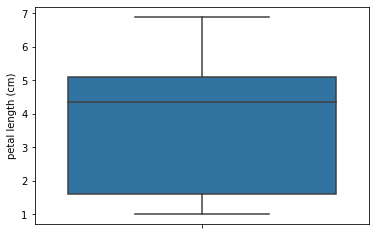

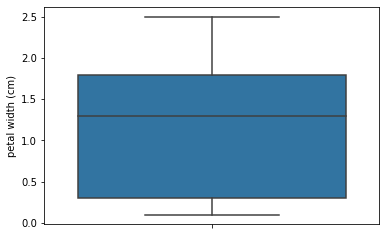

In [25]:
cols=iris_df.columns
for i in cols:
    sns.boxplot(y=iris_df[i])
    plt.show()

In [50]:
# to remove outliers from sepal width (cm)

r1 = iris_df['sepal width (cm)'].quantile(0.25)
r2 = iris_df['sepal width (cm)'].quantile(0.75)
irr = r2+r1
iris_df = iris_df[(iris_df['sepal width (cm)'] >= r1-1.5*irr) & (iris_df['sepal width (cm)'] <= r2+1.5*irr)]
iris_df.shape

(150, 4)

In [37]:
x= iris_df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [38]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


**Here we find the optimal number for K-means and determine the value of K**

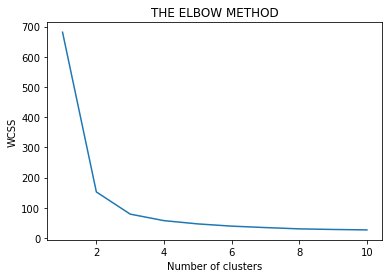

In [51]:
# WE PLOT THE RESULT GRAPH AND OBSERVE ' THE ELBOW '

plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within the given number of cluster squares
plt.show()

**CREATING K-MEANS CLASSIFIER**


In [43]:
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

**GRAPHICAL VISUALIZATION OF DATA**


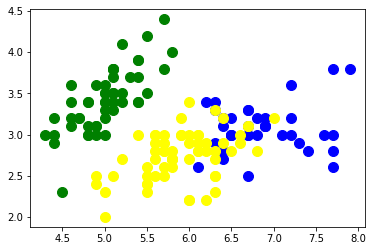

In [44]:
plt.scatter(x[y_kmeans== 0,0] , x[y_kmeans == 0,1] , s=100,c='blue' , label= 'Iris-setosa')
plt.scatter(x[y_kmeans== 1,0], x[y_kmeans == 1,1], s=100, c='green',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans ==2,1],s=100,c='yellow',label='virginica')

**TO PLOT THE CENTROIDS OF THE CLUSTER**

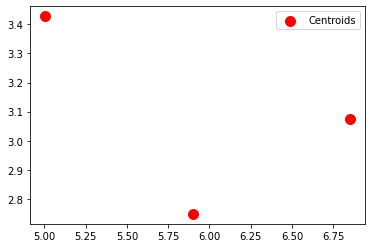

In [47]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100,c='red',label='Centroids')
plt.legend()

**COMBING THE GRAPH OF CLUSTERS AND CENTROIDS**

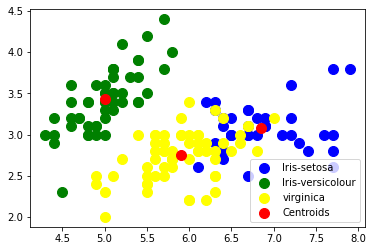

In [49]:
#GRAPH FOR CLUSTER
plt.scatter(x[y_kmeans== 0,0] , x[y_kmeans == 0,1] , s=100,c='blue' , label= 'Iris-setosa')
plt.scatter(x[y_kmeans== 1,0], x[y_kmeans == 1,1], s=100, c='green',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans ==2,1],s=100,c='yellow',label='virginica')

#GRAPH FOR CENTROIDS
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100,c='red',label='Centroids')

plt.legend()



**Thus this is how we predict  Iris data clusters using  unsupervised ML...**
**THANK YOU!!**